In [1]:
%load_ext autoreload
%autoreload 2
from ds_utils.ds_preamble import *
from ds_utils.ds_helper import *
from ds_utils.ds_plotting import *
# from glob import glob
# import re
# import datetime
# import duckdb
# import pathlib
# from ds_utils.ds_preamble import *  # # self-defined module
# from ds_utils.ds_helper import *  # self-defined module
# from ds_utils.ds_plotting import *  # # self-defined module
# import seaborn as sns
tips = sns.load_dataset('tips')
tips_tiny = tips.sample(20)

df = tips
    
titanic = sns.load_dataset('titanic')

np.random.seed(123)
tips['decile'] = np.random.randint(1,4, size=len(tips))

train = tips.sample(frac=0.7, random_state=30).reset_index(drop=True)
test = tips.drop(train.index).reset_index(drop=True)
# survey = pd.read_csv("/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/data/stack-overflow-developer-survey-2019/survey_results_public.csv").sample(10_000)

# import importlib
# importlib.reload(ds_preamble)
import math

import scipy as sp
from math import comb
from functools import cache

np.set_printoptions(suppress=True)

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

calling self ds_preamble..
calling ds_helper...


# truth-table-generator

In [48]:
import ttg
ttg.Truths(['p', 'q', 'r'], ints=False, ascending=True)

+-----+-----+-----+
|  p  |  q  |  r  |
|-----+-----+-----|
|  0  |  0  |  0  |
|  0  |  0  |  1  |
|  0  |  1  |  0  |
|  0  |  1  |  1  |
|  1  |  0  |  0  |
|  1  |  0  |  1  |
|  1  |  1  |  0  |
|  1  |  1  |  1  |
+-----+-----+-----+


In [47]:
ttg.Truths(
    ['p', 'q', 'r'], 
    [
        '((~r) and q) = (~p)', '~(r => (p or (~q)))', 
        '(((~r) and q) = (~p)) != (~(r => (p or (~q))))',
        '(((~r) and q) = (~p)) != ~(r => (p or (~q)))',
    ], 
    ints=True, 
    ascending=False
    ).as_pandas()


,p,q,r,((~r) and q) = (~p),~(r => (p or (~q))),(((~r) and q) = (~p)) != (~(r => (p or (~q)))),(((~r) and q) = (~p)) != ~(r => (p or (~q)))
1,1,1,1,1,0,1,1
2,1,1,0,0,0,0,0
3,1,0,1,1,0,1,1
4,1,0,0,1,0,1,1
5,0,1,1,0,1,1,1
6,0,1,0,1,0,1,1
7,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0


In [22]:
# print(ttg.Truths(['p', 'q'], ['p and q', 'p or q', '(p or (~q)) => (~p)'], ints=False))

table = ttg.Truths(['p', 'q'], ['p and q', 'p or q', '(p or (~q)) => (~p)'], ints=False)

# as_prettytable
# as_tabulate
# print(table.as_prettytable())
# print(table)
# print(table.as_tabulate())
table.as_pandas()

,p,q,p and q,p or q,(p or (~q)) => (~p)
1,True,True,True,True,False
2,True,False,False,True,False
3,False,True,False,True,True
4,False,False,False,False,True


In [5]:
ttg.Truths?

Init signature: ttg.Truths(bases=None, phrases=None, ints=True, ascending=False)
Docstring:      Class Truhts with modules for table formatting, valuation and CLI
File:           ~/miniforge3/envs/data_science/lib/python3.10/site-packages/ttg/ttg.py
Type:           type
Subclasses:     

In [4]:
import ttg
# print(ttg.Truths(['p', 'q', 'r']))
print(ttg.Truths(
    ['p', 'q', 'r'], 
    ['p and q and r', 'p or q or r', '(p or (~q)) => r'],
    ints=False,
    )
)

# ttg.Truths?
print(ttg.Truths(['p', 'q'], ['p and q', 'p or q', '(p or (~q)) => (~p)'], ints=False))




+-----+-----+-----+-----------------+---------------+--------------------+
|  p  |  q  |  r  |  p and q and r  |  p or q or r  |  (p or (~q)) => r  |
|-----+-----+-----+-----------------+---------------+--------------------|
|  1  |  1  |  1  |        1        |       1       |         1          |
|  1  |  1  |  0  |        0        |       1       |         0          |
|  1  |  0  |  1  |        0        |       1       |         1          |
|  1  |  0  |  0  |        0        |       1       |         0          |
|  0  |  1  |  1  |        0        |       1       |         1          |
|  0  |  1  |  0  |        0        |       1       |         1          |
|  0  |  0  |  1  |        0        |       1       |         1          |
|  0  |  0  |  0  |        0        |       0       |         0          |
+-----+-----+-----+-----------------+---------------+--------------------+
+-----+-----+-----------+----------+-----------------------+
|  p  |  q  |  p and q  |  p or q  |  (

## scipy
- important: 
	- `stats.moment(a, moment=1)` is central moment, and it is for a sample, not a theoretical distribution!
	- in contrast, `rv.moment(1)` will give moment about origin
- to get non-fisher kurtosis, we need `stats.kurtosis(data, fisher=False)`
- `rv.stats(moments='mvsk')`: find the four important statistics at the same time
- for `rv.stats()` without arguments, it will find mean and variance only

- tricky parameter settings for common distributions
	- `expon`: scale = mean = 1/lambda
		- `expon(scale = 1/a) = expon(lambda = 1)`
	- `unifrom(loc=a, scale=b-a) = U(a,b)` 

### moments, skew, kurtosis

In [ ]:
print("# ----------------------- sample skewness and kurtosis ----------------------- #")
n = 10**5
data = stats.expon(1).rvs(n)
stats.moment(data, 2) == data.var() # central moment
stats.moment(data, 3)/data.std()**3 == stats.skew(data) 
stats.moment(data, 4)/data.std()**4 == stats.kurtosis(data, fisher=False) 
stats.skew(data)

print("# --------------------- population skewness and kurtosis --------------------- #")
rv = stats.expon(1)
rv.stats(moments='mvsk') 
rv.moment(0) # moment about origin
rv.moment(1) # moment about origin: E(X)
rv.moment(2) # moment about origin: E(X^2)
rv.moment(3) # moment about origin: E(X^3)


stats.norm().stats(moments='mvsk')
stats.norm(scale=10).stats(moments='mvsk')
stats.t(df=100).stats(moments='mvsk')
stats.norm().stats(moments='mvsk')
stats.kurtosis(stats.norm().rvs(10000), fisher=False)

# ----------------------- sample skewness and kurtosis ----------------------- #


True

False

False

1.9845082269266912

# --------------------- population skewness and kurtosis --------------------- #


(2.0, 1.0, 2.0, 6.0)

1.0

2.0

5.0

16.0

(0.0, 1.0, 0.0, 0.0)

(0.0, 100.0, 0.0, 0.0)

(0.0, 1.0204081632653061, 0.0, 0.0625)

(0.0, 1.0, 0.0, 0.0)

3.0108567393512122

## skewness and curtosis

In [ ]:
n = 10**5
stats.skew(stats.expon(loc=100).rvs(n))
stats.skew(stats.expon(loc=0.1).rvs(n))
stats.skew(stats.norm().rvs(n)) # norm is symmetric, so skewness is 0

2.028483582744561

1.9621206007169063

-0.008729279710916325

### useful statistical functions
- pdf, cdf, sf, ppf, isf
- for `norm`, `scale` is standard deviation, not variance
- important methods:
	- rvs, pdf, cdf, sf, ppf, isf
		- cdf, sf gives probability
		- ppf, isf gives value
	- moment(order)
	- stats
	- entropy
	- mean/median/var
	- interval
- `sem` is standard error for mean. Very important
	- `stats.sem(x) = np.std(x, ddof=1) / np.sqrt(len(x))`

In [ ]:
# N(loc, scale^2)
# dist = stats.norm(loc=5, scale=3)
dist = stats.norm(loc=0, scale=2) # sd is 1
dist.mean()
dist.median()
dist.std()
dist.var()
dist.stats(moments='mvsk')
dist.moment(n=3) # about original

dist.rvs(10) # generate samples from the distribution

print("---- distribution ----")
# give probability
dist.cdf(1.96)
dist.sf(1.96) # same as 1-cdf

# give value
dist.ppf(0.975) # 97.5 percentile
dist.isf(0.025) # same as dist.ppf(0.975)

dist.pdf([-1,0,1])
dist.interval(0.95) # same as (dist.ppf(0.025), dist.ppf(0.975))

print("--- sem ---")
x = stats.norm().rvs(100)
stats.sem(x)
np.std(x, ddof=1) / np.sqrt(len(x))

0.0

0.0

2.0

4.0

(0.0, 4.0, 0.0, 0.0)

0.0

array([ 1.57831284, -4.03861183, -2.23928998,  1.36519926,  2.9900606 ,
        0.91219492, -6.67585183,  0.13186035,  4.69552121,  0.64893408])

---- distribution ----


0.8364569406723077

0.16354305932769236

3.919927969080108

3.919927969080109

array([0.17603266, 0.19947114, 0.17603266])

(-3.919927969080108, 3.919927969080108)

In [ ]:
# further example
stats.norm.pdf([0,1])

stats.norm.cdf([-1.645, 0])
stats.norm.ppf([0.05,0.5]) # 0.05 quantile

stats.norm.sf([-1.645, 0])
stats.norm.isf([0.05, 0.5]) # 0.05 quantile

stats.norm.stats()
X = stats.norm(1, 0.5)
X.mean()
X.var()
X.std()
X.median()

[X.moment(n) for n in range(5)]


stats.norm.interval(0.95)
stats.norm.ppf([0.025,0.975]) # same as above

array([0.39894228, 0.24197072])

array([0.04998491, 0.5       ])

array([-1.64485363,  0.        ])

array([0.95001509, 0.5       ])

array([1.64485363, 0.        ])

(0.0, 1.0)

1.0

0.25

0.5

1.0

[1.0, 1.0, 1.25, 1.75, 2.6875]

(-1.959963984540054, 1.959963984540054)

array([-1.95996398,  1.95996398])

In [ ]:
# normal 
data = stats.norm(loc=5, scale=3).rvs(10000)
stats.describe(data)
stats.moment(data, moment=5)
stats.iqr(data) # interquartile range
stats.sem(data) # standard error of the mean. ddof = 1 by default
stats.sem(data) == np.std(data, ddof=1) / np.sqrt(len(data))

DescribeResult(nobs=10000, minmax=(-6.31393755425723, 17.005827923579584), mean=5.008624997262224, variance=8.978780876251541, skewness=-0.0016151888159902155, kurtosis=0.01734187959222311)

15.002752720570905

4.088496836233563

0.02996461392417987

True

1.0

1.0

# statsmodel package
- if we use `smf.ols`, then a column of 1 is added automatically
- if we use `sm.ols`, we need to add a column of 1 ourselves
	- use `sm.add_constant(data)` for this purpose. The column of 1 will be the first column
- for `.fit`, it returns an object with many methods:
	- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html#statsmodels.regression.linear_model.RegressionResults
- for `.summary` method, it has many parameters:
	- https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.summary.html#statsmodels.regression.linear_model.RegressionResults.summary
	- `yname=None, xname=None, title=None, alpha=0.05, slim=False`
- for `.summary`, it will return an object with many methods
	- https://www.statsmodels.org/stable/generated/statsmodels.iolib.summary.Summary.html#statsmodels.iolib.summary.Summary
	- can use `as_text`, `as_latex`, `as_html`, `as_csv`, `add_extra_text`
- for linear_model.PredictionResults:
	- https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.PredictionResults.html
- we want the following:
- value, p-value, CI of each parameter
- CI and PI of y
- MSE, SSE, R^2

- in `res.get_prediction().summary_frame()`:
	- mean: prediction, i.e, y^hat
	- mean_se: sd(y^hat)
	- mean_ci_low: lower limit of CI for E(y)
	- obs_ci_low: lower limit of PI for y

- important knowledge:
	- 95% CI for E(Y): 95% of the time E(Y) should be bounded by the CI
	- 95% PI for Y: 95% of the time Y should be bounded by the PI
	- OLS line is estimating the line of E(Y)
	- for `bse`, the standard error are based on mse


## properties of fitted model
- ess: ss - explained
- ssr: ss - residual

## example from HKCC regression course
- Ex 1: simple linear 
	- b0 = `1.446408652`
	- b1 = `0.010010839`
	- SSE = `1.75605609`
	- sqrt(MSE) = `0.419053229`
	- 95% CI for b0 = `(0.2025, 2.6903)`
	- 95% CI for b1 = `(0.0083, 0.0117)`
	- 99% HT for b1, right-tailed = `13.1464`
	- 99% CI for E(Y) at x = `600: (6.9786,7.9272)`
	- 99% PI for Y at x = `600: (6.0428,8.8631)`
	- SS regression = `30.34931058`
	- SS error = `1.75605609`
	- SS total = `32.10536667`
	- F-statistic for whole model = `172.8265`
	- R^2 = `0.9453`
	- r = `0.9723`
- Ex 2: multiple linear


In [2]:
# simple linear example
path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/SEHH3164_Python/lecture notes/data/regression_1.csv'
pd.read_csv(path)[:2] # need to remove useless columns
data = pd.read_csv(path).iloc[:, 1:].set_axis(['x','y'], axis=1)

# data.x = (data.x - data.x.mean())/data.x.std()

data[:2]

# data = pd.read_csv(path)
# data
res = smf.ols("y ~ x", data=data).fit()

# ------------------------- get parameter information ------------------------ #
print(
    res.summary(
        alpha=0.01, slim=True, yname='my_y', xname=['beta_0','beta_1'], title='my regression result'
        ).as_text()
)

# print(res.summary(alpha=0.01).as_text())

,Store,Number of Customers,Sales ('000)
0,1,907,11.20
1,2,926,11.05


,x,y
0,907,11.20
1,926,11.05


                             my regression result                             
Dep. Variable:                   my_y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
No. Observations:                  12   F-statistic:                     172.8
Covariance Type:            nonrobust   Prob (F-statistic):           1.23e-07
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
beta_0         1.4464      0.558      2.591      0.027      -0.323       3.216
beta_1         0.0100      0.001     13.146      0.000       0.008       0.012

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


/Users/whlin/miniforge3/envs/data_science/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [74]:
compare = smf.ols("y ~ 1", data=data).fit()
sm.stats.anova_lm(compare, res , typ=1)

res.summary()

compare.summary()

sm.stats.anova_lm(res)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,11.0,32.105367,0.0,NaN,NaN,NaN
1,10.0,1.756056,1.0,30.349311,172.826545,1.233233e-07


/Users/whlin/miniforge3/envs/data_science/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.23e-07
Time:                        15:50:30   Log-Likelihood:                -5.4962
No. Observations:                  12   AIC:                             14.99
Df Residuals:                      10   BIC:                             15.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4464      0.558      2.591      0.027       0.202       2.690
x              0.0100      0.001     13.146      0.000       0.008       0.012
==============================================================================
Omnibus:                        0.687   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.583
Skew:                          -0.078   Prob(JB):                        0.747
Kurtosis:                       1.931   Cond. No.                     3.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 11 Jun 2023   Prob (F-statistic):                nan
Time:                        15:50:30   Log-Likelihood:                -22.932
No. Observations:                  12   AIC:                             47.86
Df Residuals:                      11   BIC:                             48.35
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6117      0.493     17.462      0.000       7.526       9.697
==============================================================================
Omnibus:                        1.688   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                0.839
Skew:                           0.123   Prob(JB):                        0.657
Kurtosis:                       1.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,30.349311,30.349311,172.826545,1.233233e-07
Residual,10.0,1.756056,0.175606,NaN,NaN


In [45]:
# attributes and methods of res object
print("# ---------------------------------- errors ---------------------------------- #")
print(f"{res.centered_tss = }")
print(f"{res.ess = }")  # SSR
print(f"{res.ssr = }") # SSE
print(f"{res.mse_model = }") # MSR. Same as res.ess / res.df_model
print(f"{res.mse_resid = }") # MSE. Same as res.ssr / res.df_resid
print(f"{res.mse_total = }") # MST
print(f"{res.rsquared = }") # R^2. Same as res.ess / res.centered_tss
print(f"{res.rsquared_adj = }") # adjusted R^2. Same as 1 - res.mse_resid / res.mse_total

print("# ---------------------------------- F-test ---------------------------------- #")
res.fvalue # f stat for whole model
res.f_pvalue # p value of f-test for whole model 

print("# ------------------------------ parameter info ------------------------------ #")
res.params.rename("parameter values") # parameter values as a Series
res.bse.rename("standard error of parameters") # b = beta => standard error of coefficients. NOTE: standard deviation of error is estimated by MSE
res.pvalues.rename("p values of parameters (two-tailed)") # The two-tailed p values for the t-stats of the params.
res.tvalues.rename("t-stats of parameters")

print("# ---------------------------- info of each sample ---------------------------- #")
res.fittedvalues[:2] # similar to res.predict(), but this gives a series, not ndarray
res.predict()[:2] # without arguments, predict on the train set
res.resid[:2] # residual of the train data

res.nobs # number of observations
# pred = res.get_prediction()


print("# ------------------------------- some identify ------------------------------ #")
# SST = SSR + SSE
print(f"{res.ssr + res.ess} == {res.centered_tss}")

# R^2 = SSR/SST = 1 - SSE/SST
print(f"{res.ess / res.centered_tss} == {1 - res.ssr / res.centered_tss}")

# adjusted R^2
1 - res.mse_resid / res.mse_total

# ---------------------------------- errors ---------------------------------- #
res.centered_tss = 32.10536666666666
res.ess = 30.349310579644936
res.ssr = 1.7560560870217268
res.mse_model = 30.349310579644936
res.mse_resid = 0.17560560870217268
res.mse_total = 2.9186696969696966
res.rsquared = 0.945303347404378
res.rsquared_adj = 0.9398336821448159
# ---------------------------------- F-test ---------------------------------- #


172.82654468694906

1.2332332207754597e-07

# ------------------------------ parameter info ------------------------------ #


Intercept    1.446409
x            0.010011
Name: parameter values, dtype: float64

Intercept    0.558301
x            0.000761
Name: standard error of parameters, dtype: float64

Intercept    2.691611e-02
x            1.233233e-07
Name: p values of parameters (two-tailed), dtype: float64

Intercept     2.590732
x            13.146351
Name: t-stats of parameters, dtype: float64

# ---------------------------- info of each sample ---------------------------- #


0    10.526240
1    10.716446
dtype: float64

array([10.52623966, 10.71644561])

0    0.673760
1    0.333554
dtype: float64

12.0

# ------------------------------- some identify ------------------------------ #
32.10536666666666 == 32.10536666666666
0.945303347404378 == 0.945303347404378


0.9398336821448159

In [46]:
print("# ---------------------------- get CI and PI for y --------------------------- #")
# create data to be predicted
X_test = pd.DataFrame([[600],[1000]], columns=['x'])
X_test
pred = res.get_prediction(pd.DataFrame([[600],[1000]], columns=['x']))

pred.summary_frame(alpha=0.01)
pred.conf_int(alpha=0.01)

# just show y^hat
res.predict(pd.DataFrame([[600],[1000]], columns=['x']))


print("# --------------------- attributres of res.get_prediction -------------------- #")
print(f"{pred.predicted_mean = }")
print(f"{pred.var_pred_mean = }")
print(f"{pred.var_resid = }")
print(f"{pred.df = }")
print(f"{pred.se_mean = }")
print(f"{pred.se_obs = }")

# 0.419053229 * np.sqrt(1/12 + (600-8589/12)**2/302836.25)

# ---------------------------- get CI and PI for y --------------------------- #


,x
0,600
1,1000


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.452912,0.149676,6.978548,7.927276,6.042644,8.863180
1,11.457248,0.247964,10.671382,12.243113,9.914063,13.000432


array([[ 6.97854768,  7.92727638],
       [10.67138208, 12.24311333]])

0     7.452912
1    11.457248
dtype: float64

# --------------------- attributres of res.get_prediction -------------------- #
pred.predicted_mean = array([ 7.45291203, 11.45724771])
pred.var_pred_mean = array([0.02240293, 0.06148616])
pred.var_resid = 0.17560560870217268
pred.df = 10.0
pred.se_mean = array([0.14967609, 0.24796403])
pred.se_obs = array([0.44498151, 0.4869207 ])


## multiple regression example from HKCC course

In [102]:
path = '/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Documents/python/SEHH3164_Python/lecture notes/data/regression_2.csv'
data = pd.read_csv(path).set_axis(['x_1','x_2','y'], axis=1)

# standardization
# data.iloc[:, :2] = (data.iloc[:, :2] - data.iloc[:, :2].mean()) / data.iloc[:, :2].std()
data
res = smf.ols('y ~ x_1 + x_2', data).fit()

res.summary(slim=True, alpha=0.05)


# data.insert(0, 'const', 1)
f_regression(data.drop('y', axis=1), data.y)
sm.stats.anova_lm(res, typ=1)
sm.stats.anova_lm(res, typ=2)
sm.stats.anova_lm(res, typ=3)


# temp = res.get_prediction(pd.DataFrame(np.array([[35,250]]), columns=['x_1','x_2']))
# temp.summary_frame(alpha=0.02)

# res.mse_resid
# res.mse_total
# res.mse_model
# res.mse_resid # mse 
# res.mse_total
# res.ssr # sse
# res.df_model
# res.df_resid
# 6.0508**2

# anova for each variable 
# sm.stats.anova_lm(res, typ=1)
# sm.stats.anova_lm(res, typ=2)
# sm.stats.anova_lm(res, typ=3) # partial F-test for each parameter. We should use typ=3
# sm.stats.anova_lm(smf.ols('y ~ x_2 ', data).fit(), res, typ=1)
# sm.stats.anova_lm(smf.ols('y ~ 1 ', data).fit(), res, typ=1)
# sm.stats.anova_lm(res, smf.ols('y ~ 1', data).fit(), typ=1)


# n = 13
# (73.814551 - 47.863639)/(47.863639/(n-5))
# (2715.763077 - 906.336344) / (906.336344/(n-2))
# (883.866917 - 74.762112 ) / (74.762112 / (n-3))

,x_1,x_2,y
0,42,272,95
1,33,226,77
2,33,259,80
3,45,292,100
4,39,311,97
5,36,183,70
6,32,173,50
7,41,236,80
8,40,230,92
9,38,235,84


/Users/whlin/miniforge3/envs/data_science/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.837
No. Observations:                  10   F-statistic:                     24.09
Covariance Type:            nonrobust   Prob (F-statistic):           0.000727
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.9932     17.763     -1.294      0.237     -64.995      19.009
x_1            1.3957      0.583      2.396      0.048       0.018       2.773
x_2            0.2176      0.058      3.767      0.007       0.081       0.354
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([12.83406161, 26.65411443]), array([0.00716253, 0.00086074]))

,df,sum_sq,mean_sq,F,PR(>F)
x_1,1.0,1244.655121,1244.655121,33.995784,0.000643
x_2,1.0,519.560577,519.560577,14.190975,0.007010
Residual,7.0,256.284302,36.612043,NaN,NaN


,sum_sq,df,F,PR(>F)
x_1,210.153818,1.0,5.740019,0.047758
x_2,519.560577,1.0,14.190975,0.007010
Residual,256.284302,7.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,61.349515,1.0,1.675665,0.236565
x_1,210.153818,1.0,5.740019,0.047758
x_2,519.560577,1.0,14.190975,0.007010
Residual,256.284302,7.0,NaN,NaN


In [100]:

f_regression(data.drop('y', axis=1), data.y)
sm.stats.anova_lm(res, typ=1)
sm.stats.anova_lm(res, typ=2)
sm.stats.anova_lm(res, typ=3)


(array([12.83406161, 26.65411443]), array([0.00716253, 0.00086074]))

,df,sum_sq,mean_sq,F,PR(>F)
x_1,1.0,1244.655121,1244.655121,33.995784,0.000643
x_2,1.0,519.560577,519.560577,14.190975,0.007010
Residual,7.0,256.284302,36.612043,NaN,NaN


,sum_sq,df,F,PR(>F)
x_1,210.153818,1.0,5.740019,0.047758
x_2,519.560577,1.0,14.190975,0.007010
Residual,256.284302,7.0,NaN,NaN


,sum_sq,df,F,PR(>F)
Intercept,61.349515,1.0,1.675665,0.236565
x_1,210.153818,1.0,5.740019,0.047758
x_2,519.560577,1.0,14.190975,0.007010
Residual,256.284302,7.0,NaN,NaN


## simulated example

In [83]:
np.random.seed(2)
n_samples = 100
n_coef = 3
X = pd.DataFrame(np.random.normal(size=(n_samples,n_coef)), columns=[f"x_{i+1}" for i in range(n_coef)])
X = X.assign(y=lambda X: X.sum(axis=1) + np.random.normal(loc=2, scale=4, size=n_samples))
X
full = smf.ols("y ~ x_1 + x_2 + x_3", data=X).fit()
full.summary(slim=True)
L1 = smf.ols("y ~ x_2 + x_3", data=X).fit()

L1.summary()

sm.stats.anova_lm(full, L1)
sm.stats.anova_lm(full, typ=3)

# full

,x_1,x_2,x_3,y
0,-0.416758,-0.056267,-2.136196,2.874142
1,1.640271,-1.793436,-0.841747,3.376315
2,0.502881,-1.245288,-1.057952,-4.197548
3,-0.909008,0.551454,2.292208,1.208532
4,0.041539,-1.117925,0.539058,2.182939
...,...,...,...,...
95,-0.139292,0.032565,-1.640560,3.103446
96,-1.156699,1.234035,1.028185,2.270706
97,-0.721880,1.933157,-1.070796,2.690953
98,-0.571382,0.292432,-1.195000,0.112642


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.032
No. Observations:                 100   F-statistic:                     2.094
Covariance Type:            nonrobust   Prob (F-statistic):              0.106
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8984      0.402      7.209      0.000       2.100       3.696
x_1            0.6629      0.367      1.806      0.074      -0.066       1.392
x_2            0.5498      0.398      1.382      0.170      -0.240       1.340
x_3            0.3764      0.395      0.954      0.343      -0.407       1.160
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.476
Date:                Sun, 11 Jun 2023   Prob (F-statistic):              0.234
Time:                        16:08:16   Log-Likelihood:                -279.83
No. Observations:                 100   AIC:                             565.7
Df Residuals:                      97   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8333      0.405      6.994      0.000       2.029       3.637
x_2            0.4797      0.401      1.197      0.234      -0.316       1.275
x_3            0.4882      0.394      1.238      0.219      -0.294       1.271
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.757
Skew:                           0.321   Prob(JB):                        0.415
Kurtosis:                       3.100   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,96.0,1526.256875,0.0,NaN,NaN,NaN
1,97.0,1578.117419,-1.0,-51.860544,3.187642,NaN


,sum_sq,df,F,PR(>F)
Intercept,826.235605,1.0,51.969376,1.287706e-10
x_1,51.860544,1.0,3.261975,7.403730e-02
x_2,30.347473,1.0,1.908825,1.703008e-01
x_3,14.461867,1.0,0.909637,3.426062e-01
Residual,1526.256875,96.0,NaN,NaN


In [90]:
# X.drop('y', axis=1)
# X
# X.y
f_regression(X.drop('y', axis=1), X.y)

(array([3.40677556, 1.41077671, 1.51142805]),
 array([0.06794816, 0.23779827, 0.22186487]))

## regression on tips dataset

In [131]:
res = smf.ols('tip ~ total_bill + size', data=tips).fit()
res.summary()

# """
# t = (coef - 0) / std err
# P>|t| = stats.t(242).sf(3.455)*2
# 0.025 = coef - stats.t(242).isf(0.025)*(std err)
# 0.975 = coef + stats.t(242).isf(0.025)*(std err)
# """

coef = .6689
std_err = .194
df = 242
alpha = 0.05

coef/std_err # t
round(stats.t(df).sf(3.455)*2, 3) # P>|t|
ME = stats.t(df).isf(alpha/2) * std_err
coef - ME
coef + ME

# res.predict(tips[['total_bill', 'size']])
res.predict()[:2]
res.get_prediction(tips[['total_bill', 'size']]).summary_frame()[:2]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           9.67e-34
Time:                        18:01:26   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.447938144329897

0.001

0.28675586397789704

1.051044136022103

array([2.62933992, 2.20539403])

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.629340,0.075758,2.480108,2.778572,0.627309,4.631371
1,2.205394,0.129432,1.950431,2.460357,0.192718,4.218070


### example from official doc: underlying process = quadratic 
- underlying generating process: `y = 1 + 0.1x + 10x^2 + error`
- regression model: `y = b0 + b1*x + b2*x^2`


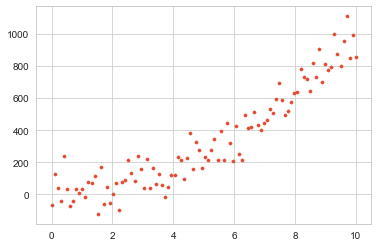

In [245]:
# -------------------- underlying data generating process -------------------- #
np.random.seed(9876789)
n_samples = 100
x = np.linspace(0, 10, n_samples)
e = np.random.normal(scale=80, size=n_samples)
beta = [1,0.1,10]
X = np.vstack([
    np.ones(n_samples), 
    x,
    x**2,
    ]).T

y = X@beta + e

plt.scatter(x,y, s=10)

# ------------------------------- model fitting ------------------------------ #
model = sm.OLS(y, X)
results = model.fit()
print(results.summary(slim=True))
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

# ## generate data
# np.random.seed(9876789)
# nsample = 100
# x = np.linspace(0, 10, 100)
# X = np.column_stack((x, x ** 2))
# beta = np.array([1, 0.1, 10])
# e = np.random.normal(scale=80, size=nsample)
# X = sm.add_constant(X)
# y = np.dot(X, beta) + e
# # plt.plot(x, y, 'o', s=3)
# plt.scatter(x, y, s=10)

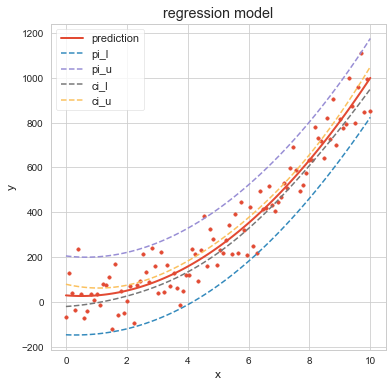

In [276]:
pred_ols = results.get_prediction()
pi_l = pred_ols.summary_frame(alpha=0.05)["obs_ci_lower"]
pi_u = pred_ols.summary_frame(alpha=0.05)["obs_ci_upper"]
ci_l = pred_ols.summary_frame(alpha=0.05)["mean_ci_lower"]
ci_u = pred_ols.summary_frame(alpha=0.05)["mean_ci_upper"]

_ = plt.figure(figsize=(6,6))
_ = plt.scatter(x, y, s=12)
_ = plt.plot(x, results.fittedvalues, lw=2, label='prediction')
_ = plt.plot(x, pi_l, '--', label='pi_l')
_ = plt.plot(x, pi_u, '--', label='pi_u')
_ = plt.plot(x, ci_l, '--', label='ci_l')
_ = plt.plot(x, ci_u, '--', label='ci_u')
_ = plt.legend()
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title("regression model")

### example from official doc: underlying process = sine curve


In [309]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     234.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           7.24e-28
Time:                        11:16:58   Log-Likelihood:                -32.397
No. Observations:                  50   AIC:                             72.79
Df Residuals:                      46   BIC:                             80.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4870      0.025     19.211      0.0

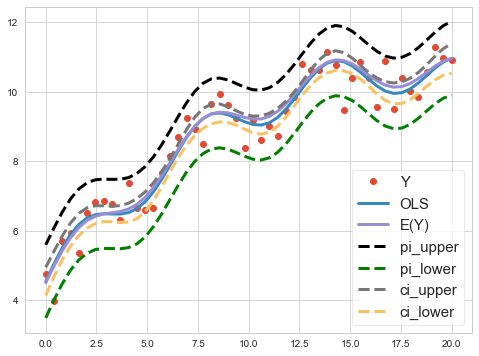

In [311]:
pred_ols = res.get_prediction()
pi_l = pred_ols.summary_frame(alpha=0.05)["obs_ci_lower"]
pi_u = pred_ols.summary_frame(alpha=0.05)["obs_ci_upper"]
ci_l = pred_ols.summary_frame(alpha=0.05)["mean_ci_lower"]
ci_u = pred_ols.summary_frame(alpha=0.05)["mean_ci_upper"]
# pi_u

fig, ax = plt.subplots(figsize=(8, 6))

_ = ax.plot(x, y, "o", label="Y")
# _ = ax.plot(x, y_true, "b-", label="E(Y)")
# _ = ax.plot(x, res.fittedvalues, "r--.", label="OLS")
# _ = ax.plot(x, res.fittedvalues, "r--", label="OLS", lw=2)
_ = ax.plot(x, res.fittedvalues, label="OLS", lw=3)
_ = ax.plot(x,y_true, label='E(Y)', lw=3)
_ = ax.plot(x, pi_u, "k--", label='pi_upper', lw=3)
_ = ax.plot(x, pi_l, "g--", label='pi_lower', lw=3)
_ = ax.plot(x, ci_u, "--", label='ci_upper', lw=3)
_ = ax.plot(x, ci_l, "--", label='ci_lower', lw=3)
_ = ax.legend(loc="best", fontsize=15)

## temp

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore = sm.datasets.get_rdataset("Moore", "carData", cache=True) # load
data = moore.data
data = data.rename(columns={"partner.status" :
                            "partner_status"}) # make name pythonic
# data
moore_lm = ols('conformity ~ C(fcategory, Sum)*C(partner_status, Sum)',
                data=data).fit()
moore_lm.summary()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 Anova DataFrame
# print(table)
table


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conformity   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.734
Date:                Sun, 07 May 2023   Prob (F-statistic):            0.00740
Time:                        14:58:18   Log-Likelihood:                -129.10
No. Observations:                  45   AIC:                             270.2
Df Residuals:                      39   BIC:                             281.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   12.0508      0.728     16.564      0.000      10.579      13.522
C(fcategory, Sum)[S.high]                                    0.1903      0.999      0.191      0.850      -1.830       2.210
C(fcategory, Sum)[S.low]                                     1.0992      1.026      1.071      0.291      -0.977       3.175
C(partner_status, Sum)[S.high]                               2.4591      0.728      3.380      0.002       0.988       3.931
C(fcategory, Sum)[S.high]:C(partner_status, Sum)[S.high]    -2.8431      0.999     -2.847      0.007      -4.863      -0.823
C(fcategory, Sum)[S.low]:C(partner_status, Sum)[S.high]      1.7909      1.026      1.745      0.089      -0.285       3.867
==============================================================================
Omnibus:                        2.500   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.712
Skew:                           0.465   Prob(JB):                        0.425
Kurtosis:                       3.216   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN


## logistic regression 

In [26]:
threshold = 0.5
spector_data = sm.datasets.spector.load_pandas()
spector_data.exog = sm.add_constant(spector_data.exog)
res = sm.Logit(spector_data.endog, spector_data.exog).fit()

res.summary()
# res.summary2()

res.pred_table(threshold=threshold) # confusion matrix
res.get_margeff().summary()

res.predict()[:2] # predicted probability
(res.predict()>threshold).sum() # find how many are predicted to be positive
# res.fittedvalues()

Optimization terminated successfully.
         Current function value: 0.402801
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  GRADE   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.3740
Time:                        16:44:44   Log-Likelihood:                -12.890
converged:                       True   LL-Null:                       -20.592
Covariance Type:            nonrobust   LLR p-value:                  0.001502
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0213      4.931     -2.641      0.008     -22.687      -3.356
GPA            2.8261      1.263      2.238      0.025       0.351       5.301
TUCE           0.0952      0.142      0.672      0.501      -0.182       0.373
PSI            2.3787      1.065      2.234      0.025       0.292       4.465
==============================================================================
"""

array([[18.,  3.],
       [ 3.,  8.]])

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                  GRADE
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA            0.3626      0.109      3.313      0.001       0.148       0.577
TUCE           0.0122      0.018      0.686      0.493      -0.023       0.047
PSI            0.3052      0.092      3.304      0.001       0.124       0.486
==============================================================================
"""

array([0.02657799, 0.05950125])

11

# pyspark

In [1]:
import pyspark as sc

In [3]:
# sc.textFile("hdfs://...")